In [1]:
import pandas as pd
import numpy as np
path = '/home/antoni/Documents/Sample Data/Iris Data/bezdekIris.data.csv'
iris_data = pd.read_csv(path)
print(iris_data.head())

   sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal_width_in_cm    iris_type  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


In [2]:
iris_data['iris_type'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: iris_type, dtype: int64

#### We need to one-hot-encode the iris types. We will use the pandas .get_dummies(). Since there are only three categories. What would be the difference between doing this and label encoding? 

In [3]:
iris_data_one_hot = pd.get_dummies(iris_data, columns='iris_type', prefix='type')
print(iris_data_one_hot.columns)

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'type_Iris-setosa', 'type_Iris-setosa',
       'type_Iris-setosa', 'type_Iris-setosa', 'type_Iris-setosa',
       'type_Iris-setosa',
       ...
       'type_Iris-virginica', 'type_Iris-virginica', 'type_Iris-virginica',
       'type_Iris-virginica', 'type_Iris-virginica', 'type_Iris-virginica',
       'type_Iris-virginica', 'type_Iris-virginica', 'type_Iris-virginica',
       'type_Iris-virginica'],
      dtype='object', length=154)


#### Actually instead of one hot encoding we'll use label encoding, to keep the dimensionality lower.

In [4]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

iris_data['type_code'] = lb.fit_transform(iris_data['iris_type'])
print(iris_data.head())
 

   sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal_width_in_cm    iris_type  type_code  
0                0.2  Iris-setosa          0  
1                0.2  Iris-setosa          0  
2                0.2  Iris-setosa          0  
3                0.2  Iris-setosa          0  
4                0.2  Iris-setosa          0  


In [5]:
print(iris_data.iris_type.unique())
print(iris_data.type_code.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


In [6]:
from sklearn.model_selection import train_test_split
X = iris_data.drop(columns=['iris_type' , 'type_code'])
y = iris_data['type_code']
TX, VX, Ty, Vy = train_test_split(X, y, random_state = 0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(TX, Ty)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
pred_y = knc.predict(VX)

In [9]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Vy, pred_y))

0.02631578947368421


#### Just for visualisation purposes I will convert the data into 3 feature data, by converting length and width into area.


In [10]:
df_visualisation = iris_data.copy()
for i in df_visualisation:
    df_visualisation['sepal_area'] =  df_visualisation['sepal_length_in_cm'] * df_visualisation['sepal_width_in_cm']
    df_visualisation['petal_area'] =  df_visualisation['petal_length_in_cm'] * df_visualisation['petal_width_in_cm']


In [11]:
df_visualisation = df_visualisation.drop(columns=['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm','petal_width_in_cm'])
print(df_visualisation.head())

     iris_type  type_code  sepal_area  petal_area
0  Iris-setosa          0       17.85        0.28
1  Iris-setosa          0       14.70        0.28
2  Iris-setosa          0       15.04        0.26
3  Iris-setosa          0       14.26        0.30
4  Iris-setosa          0       18.00        0.28


In [12]:
X1 = df_visualisation.drop(columns=['iris_type' , 'type_code'])
y1 = df_visualisation['type_code']
TX1, VX1, Ty1, Vy1 = train_test_split(X1, y1, random_state = 0)

In [13]:
knc1 = KNeighborsClassifier()
knc1.fit(TX1, Ty1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Experimenting with different k-Values
Here I will be plotting different k-values alongside the MAE

In [14]:
def get_mae(knn):
    knn.fit(TX1, Ty1)
    pred = knn.predict(VX1)
    return mean_absolute_error(Vy1, pred)

In [15]:
from mlxtend.plotting import plot_decision_regions

0.02631578947368421


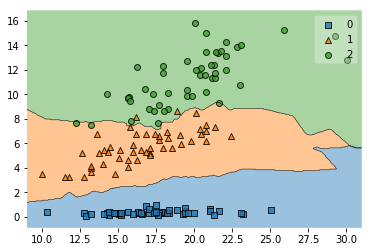

In [16]:
print(get_mae(knc1))
plot_decision_regions(X1.values, y1.values, knc1)

0.02631578947368421


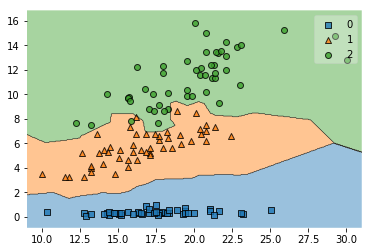

In [17]:
knc2 = KNeighborsClassifier(n_neighbors=1)
knc2.fit(TX1, Ty1)
print(get_mae(knc2))
plot_decision_regions(X1.values, y1.values, knc2)

0.02631578947368421


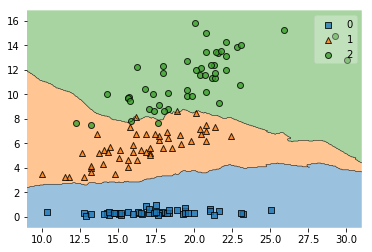

In [18]:
knc3 = KNeighborsClassifier(n_neighbors=20)
print(get_mae(knc3))
knc3.fit(TX1, Ty1)
plot_decision_regions(X1.values, y1.values, knc3)

0.15789473684210525


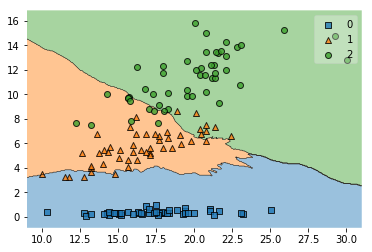

In [19]:
knc4 = KNeighborsClassifier(n_neighbors=50)
print(get_mae(knc4))
knc4.fit(TX1, Ty1)
plot_decision_regions(X1.values, y1.values, knc4)

### Experimenting with different weight functions
Here I will be plotting different k-values alongside the MAE

0.02631578947368421


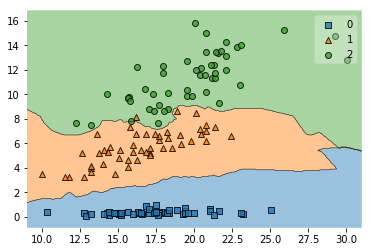

In [20]:
knc5 = KNeighborsClassifier(weights = 'distance')
print(get_mae(knc5))
knc5.fit(TX1,Ty1)
plot_decision_regions(X1.values, y1.values, knc5)

### Experimenting with changing the 'nearest' definition
Here I will be plotting different k-values alongside the MAE

0.02631578947368421


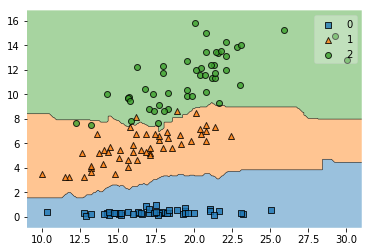

In [21]:
## Manhattan distance
knc6 = KNeighborsClassifier(p = 1)
knc6.fit(TX1, Ty1)
print(get_mae(knc6))
plot_decision_regions(X1.values, y1.values, knc6)

0.02631578947368421


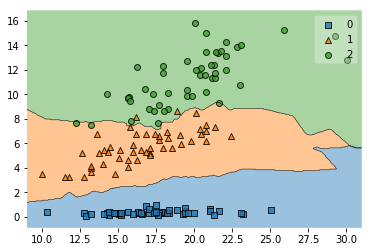

In [22]:
## Euclidean distance
knc7 = KNeighborsClassifier(p = 2)
knc7.fit(TX1, Ty1)
print(get_mae(knc7))
plot_decision_regions(X1.values, y1.values, knc7)